## Plot thalamic gradients on volume 

1. Group-averaged gradients

In [1]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
root_pth = '/Users/valkebets/Documents/Work/project-data/project__sensory_gradients/analyses_clean'
results_pth = root_pth + '/results/gradients_ctx_thal_ipsiLR_sym-thal_aligned_abide1_N211/files'

#grad_thal_asd = nib.load(results_pth + '/thal_group_loadings/rg1_norm-angle_thal_mean_loadings_asd.nii')
#grad_thal_asd = nib.load(results_pth + '/thal_group_loadings/rg2_norm-angle_thal_mean_loadings_td.nii')
#grad_thal_asd = nib.load(results_pth + '/thal_group_loadings/rg1_thal_mean_loadings_td.nii')

# Using reference template
grad_thal_asd = nib.load(results_pth + '/thal_group_loadings/rg1_norm-angle_notaligned_thal_mean_loadings_combat_td.nii')

grad_img_data = grad_thal_asd.get_fdata()
print('Dimensions of thalamus loadings: ', grad_img_data.shape)

# Load binary mask to only consider gradient values that are not zero
#mask_img = nib.load(results_pth + '/thal_group_loadings/rg1_norm-angle_thal_mean_loadings_asd_mask_bin.nii')
#mask_img = nib.load(results_pth + '/thal_group_loadings/rg2_norm-angle_thal_mean_loadings_td_mask_bin.nii')
#mask_img = nib.load(results_pth + '/thal_group_loadings/rg1_thal_mean_loadings_td_mask_bin.nii')

mask_img = nib.load(results_pth + '/thal_group_loadings/rg1_norm-angle_notaligned_thal_mean_loadings_combat_td_mask_bin.nii')

mask_img_data = mask_img.get_fdata()
print('Dimensions of mask: ', mask_img_data.shape)
print('Values in mask: ', np.unique(mask_img_data)) # should be zeros and ones

templ_img = nib.load(root_pth + '/data/ch2.nii')
templ_img_data = templ_img.get_fdata()
print('Dimensions of background template: ', templ_img.shape) # should all be the same size


Dimensions of thalamus loadings:  (181, 217, 181)
Dimensions of mask:  (181, 217, 181)
Values in mask:  [0. 1.]
Dimensions of background template:  (181, 217, 181)


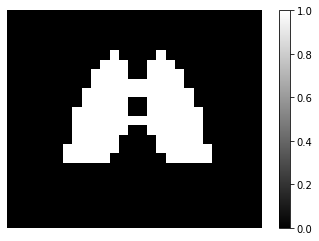

In [3]:
# Check out mask
# Axial view

z = 78
a = plt.imshow(mask_img_data[50:132, 70:140, z].T,
#a = plt.imshow(mask_img_data[:, :, z].T,
               cmap='gray',
               origin='lower',
               #vmin=0,
               #vmax=1,
              )
plt.axis('off')
plt.colorbar(a)
plt.show()

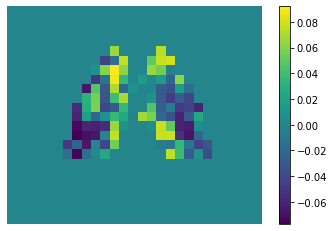

In [4]:
# Check out loadings

z = 78
b = plt.imshow(grad_img_data[50:132, 70:140, z].T,
               cmap='viridis',
               origin='lower',
              )
plt.axis('off')
plt.colorbar(b)
plt.show()

In [3]:
# Mask ASD gradient scores with binarized mask

grad_img_data[mask_img_data != 1] = np.nan # white background!
#np.unique(grad_img_data)

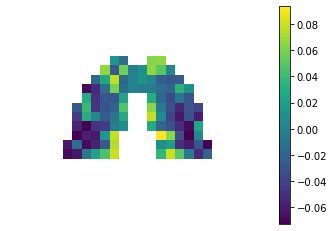

In [6]:
# Check out loadings again to check if background disappears >> works!

z = 74
c = plt.imshow(grad_img_data[50:132, 70:140, z].T,
               cmap='viridis',
               origin='lower',
              )
plt.axis('off')
plt.colorbar(c)
plt.show()

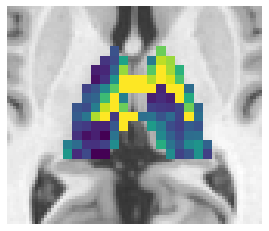

In [4]:
# Axial views

z = 78 # 70-90
d = plt.imshow(templ_img_data[50:132, 70:140, z].T,
              cmap='gray',
              origin='lower',
               alpha = 0.8)
e = plt.imshow(grad_img_data[50:132, 70:140, z].T,
               cmap='viridis',
               origin='lower',
               vmin=-0.05,
               vmax=0.05)
plt.axis('off')
#plt.colorbar(e)
#plt.savefig(root_pth + '/figs/g2_thal_loadings_td_ax' + str(z) + '.png')
plt.show()

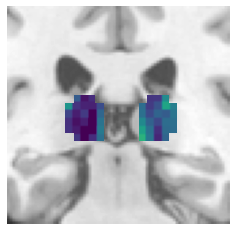

In [5]:
# Coronal views
# load background image with gray colormap

y = 97 # 95-120
f = plt.imshow(templ_img_data[50:132, y, 40:120].T,
              cmap='gray',
              origin='lower',
               alpha = 0.8)
g = plt.imshow(grad_img_data[50:132, y, 40:120].T,
               cmap='viridis',
               origin='lower',
               vmin=-0.05,
               vmax=0.05)
plt.axis('off')
#plt.colorbar(g)
#plt.savefig(root_pth + '/figs/g2_thal_loadings_td_cor' + str(y) + '.png') 
plt.show()

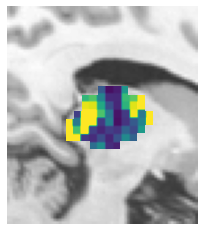

In [4]:
# Sagittal views 
# load background image with gray colormap

x =  102 # 70-110
h = plt.imshow(templ_img_data[x, 70:140, 40:120].T, # change to see all brain
              cmap='gray',
              origin='lower',
               alpha = 0.8)
i = plt.imshow(grad_img_data[x, 70:140, 40:120].T,
               cmap='viridis',
               origin='lower',
               vmin=-0.05,
               vmax=0.05,
              )
plt.axis('off')
#plt.colorbar(i)
#plt.savefig(root_pth + '/figs/g2_thal_loadings_td_sag' + str(x) + '.png') 
plt.show()